<a href="https://colab.research.google.com/github/RamMonik/FinalAnalisisDatos/blob/main/AnalisisdeDatosMonica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datos informativos

**Proyecto académico final ANALISIS DE DATOS**

---

**Nombres:**  


*   AIZPRUA BARRIOS JARIS SURYA
*   RAMÍREZ VELÁSTEGUI MÓNICA ALEXANDRA


          
          
**Fecha:**
 26/05/2024

# 1. Análisis de Datos (EDA)


### Cargar e instalar librerias necesarias

In [210]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
#instalar librerias
!pip install seaborn
import seaborn as sns

### Carga de datos de dataset

In [211]:
from google.colab import drive
#drive.mount('/content/ProyectoFinal/')
df = pd.read_csv('/content/ProyectoFinal/SeoulBikeData.csv', delimiter=",")
# Muestra las primeras filas del DataFrame para verificar que se ha cargado correctamente
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Verificar tipos de datos del datafrase y modificar la variable fecha a Date

In [212]:
def verificar_tipos(df):
    return df.dtypes

print(verificar_tipos(df))

# Convertir la columna 'Date' de objeto a datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.head()
print(verificar_tipos(df))

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object
Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)               

### Ver un resumen estadístico del dataframe

In [213]:
def resumen_estadistico(df):
    return df.describe()

resumen_estadistico(df)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746


### Verificar valores faltantes y obtiene el total de registros y el porcentaje

In [214]:
def verificar_faltantes(df):
    total = df.isnull().sum().sort_values(ascending=False)
    porcentaje = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
    return pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])

verificar_faltantes(df)

# verifica que no tiene valores faltantes

,Total,Porcentaje
Date,0,0.0
Rented Bike Count,0,0.0
Hour,0,0.0
Temperature(°C),0,0.0
Humidity(%),0,0.0
Wind speed (m/s),0,0.0
Visibility (10m),0,0.0
Dew point temperature(°C),0,0.0
Solar Radiation (MJ/m2),0,0.0
Rainfall(mm),0,0.0


### Detección y visualización de valores atípicos

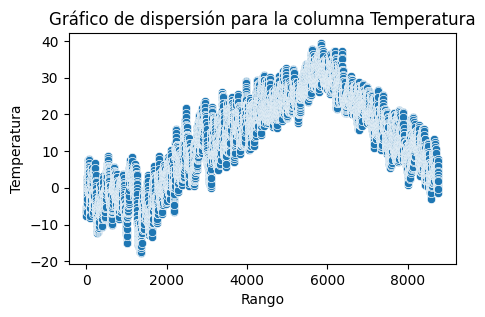

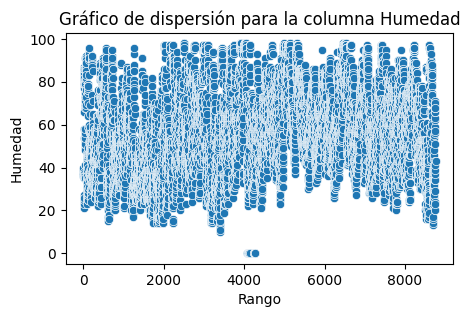

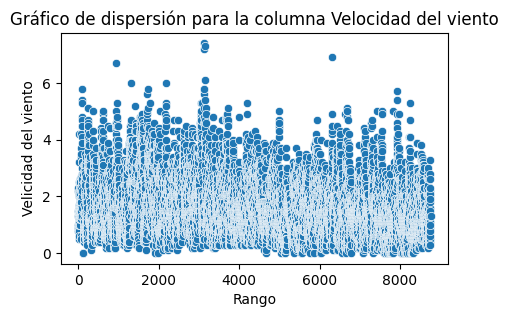

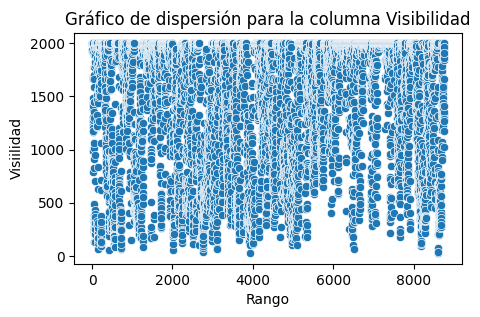

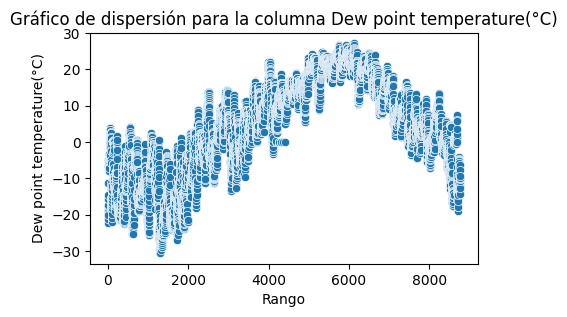

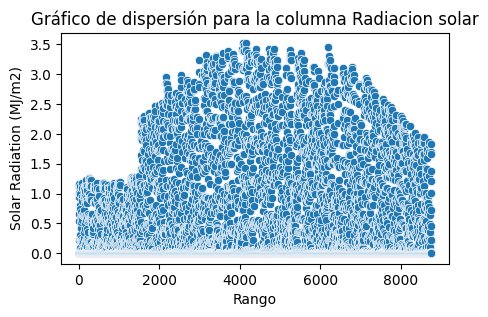

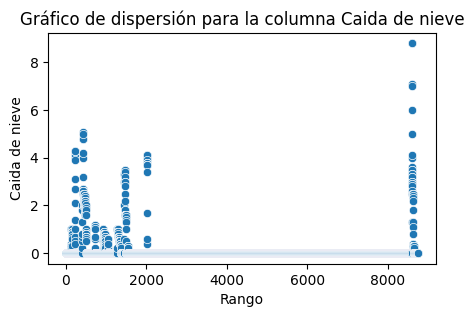

In [215]:
df.head()
#Detección y visualización de valores atípicos para la columna 'Temperature'
plt.figure(figsize=(5, 3))
sns.scatterplot(x=df.index, y=df['Temperature(°C)'])
plt.title('Gráfico de dispersión para la columna Temperatura')
plt.xlabel('Rango')
plt.ylabel('Temperatura')
plt.show()

#Detección y visualización de valores atípicos para la columna 'Humedad'
plt.figure(figsize=(5, 3))
sns.scatterplot(x=df.index, y=df['Humidity(%)'])
plt.title('Gráfico de dispersión para la columna Humedad')
plt.xlabel('Rango')
plt.ylabel('Humedad')
plt.show()

#Detección y visualización de valores atípicos para la columna 'Velocidad del viento'
plt.figure(figsize=(5, 3))
sns.scatterplot(x=df.index, y=df['Wind speed (m/s)'])
plt.title('Gráfico de dispersión para la columna Velocidad del viento')
plt.xlabel('Rango')
plt.ylabel('Velicidad del viento')
plt.show()

#Detección y visualización de valores atípicos para la columna 'Visibilidad'
plt.figure(figsize=(5, 3))
sns.scatterplot(x=df.index, y=df['Visibility (10m)'])
plt.title('Gráfico de dispersión para la columna Visibilidad')
plt.xlabel('Rango')
plt.ylabel('Visiilidad')
plt.show()

#Detección y visualización de valores atípicos para la columna 'Dew point temperature(°C)'
plt.figure(figsize=(5, 3))
sns.scatterplot(x=df.index, y=df['Dew point temperature(°C)'])
plt.title('Gráfico de dispersión para la columna Dew point temperature(°C)')
plt.xlabel('Rango')
plt.ylabel('Dew point temperature(°C)')
plt.show()


#Detección y visualización de valores atípicos para la columna Radiacion solar
plt.figure(figsize=(5, 3))
sns.scatterplot(x=df.index, y=df['Solar Radiation (MJ/m2)'])
plt.title('Gráfico de dispersión para la columna Radiacion solar')
plt.xlabel('Rango')
plt.ylabel('Solar Radiation (MJ/m2)')
plt.show()


#Detección y visualización de valores atípicos para la columna Caida de nieve
plt.figure(figsize=(5, 3))
sns.scatterplot(x=df.index, y=df['Snowfall (cm)'])
plt.title('Gráfico de dispersión para la columna Caida de nieve')
plt.xlabel('Rango')
plt.ylabel('Caida de nieve')
plt.show()


### Aplicación de técnicas EDA orientadas a determinar problemas de calidad en los datos

In [216]:
# Cambiar  a NaN todos los valores de la columna 'Humedad ' que sean cero
df['Humidity(%)'] = df['Humidity(%)'].replace(0, np.nan)

# Cambiar  a NaN todos los valores de la columna 'Velocidad del viento mayor a 6  '
df.loc[df['Wind speed (m/s)'] > 6, 'Wind speed (m/s)'] = np.nan

# Cambiar  a NaN todos los valores de la columna 'Velocidad del viento' mayor a 6
df.loc[df['Wind speed (m/s)'] > 6, 'Wind speed (m/s)'] = np.nan

# Cambiar  a NaN todos los valores de la columna 'Caida de nieve'  mayor a 6
df.loc[df['Snowfall (cm)'] > 6, 'Snowfall (cm)'] = np.nan


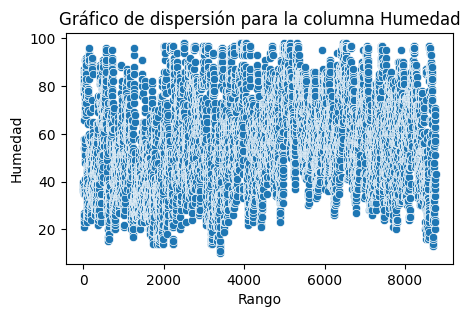

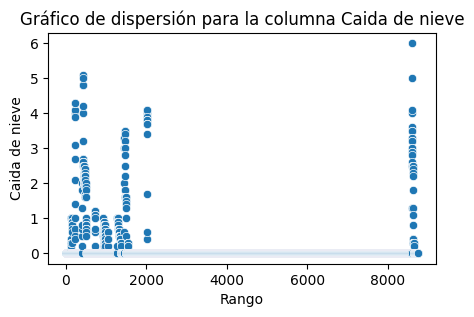

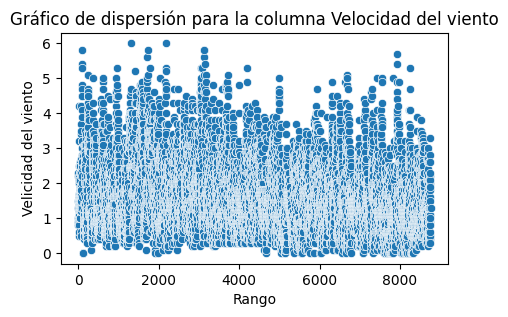

In [217]:
#Visualización  de la columna 'Humedad' sin valores atípicos
plt.figure(figsize=(5, 3))
sns.scatterplot(x=df.index, y=df['Humidity(%)'])
plt.title('Gráfico de dispersión para la columna Humedad')
plt.xlabel('Rango')
plt.ylabel('Humedad')
plt.show()


#Detección y visualización de la columna Caida de nieve sin valores atípicos
plt.figure(figsize=(5, 3))
sns.scatterplot(x=df.index, y=df['Snowfall (cm)'])
plt.title('Gráfico de dispersión para la columna Caida de nieve')
plt.xlabel('Rango')
plt.ylabel('Caida de nieve')
plt.show()


#Detección y visualización de la columna 'Velocidad del viento' sin valores atípicos
plt.figure(figsize=(5, 3))
sns.scatterplot(x=df.index, y=df['Wind speed (m/s)'])
plt.title('Gráfico de dispersión para la columna Velocidad del viento')
plt.xlabel('Rango')
plt.ylabel('Velicidad del viento')
plt.show()

### Verificar valores faltantes y obtiene el total de registros y el porcentaje y elimina los registros nulos

In [218]:
def verificar_faltantes(df):
    total = df.isnull().sum().sort_values(ascending=False)
    porcentaje = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
    return pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])

verificar_faltantes(df)

,Total,Porcentaje
Humidity(%),17,0.194064
Wind speed (m/s),6,0.068493
Snowfall (cm),4,0.045662
Date,0,0.000000
Rented Bike Count,0,0.000000
Hour,0,0.000000
Temperature(°C),0,0.000000
Visibility (10m),0,0.000000
Dew point temperature(°C),0,0.000000
Solar Radiation (MJ/m2),0,0.000000


In [219]:
# Elimina  registros con campos nulos de las columnas Humidity(%), Wind speed (m/s), Snowfall (cm) se eliminaron los registros que tengan valores nulos
print("Número de filas en el DataFrame antes de la limpieza:", len(df))
df_clean = df.dropna(subset=['Humidity(%)', 'Wind speed (m/s)','Snowfall (cm)'])

#imprimo numero de registros de df limpio
num_filas = len(df_clean)
print("Número de filas en el DataFrame luego de la limpieza:", num_filas)


Número de filas en el DataFrame antes de la limpieza: 8760
Número de filas en el DataFrame luego de la limpieza: 8733


### Obtencion de la data limpia

In [220]:
# para obtener el DatasetFinal
df_clean.to_csv('/content/ProyectoFinal/SeoulBikeDataFinal.csv', index=False)

# 2. Modelo de predicción mediante Regresión Lineal

### Cargar e instalar librerias necesarias

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn import linear_model

### Visualizo la  Variable dependiente e independiente reales

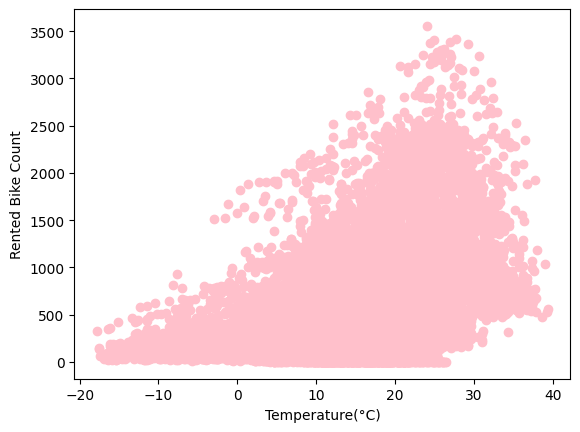

In [222]:
plt.ylabel("Rented Bike Count")
plt.xlabel("Temperature(°C)")
plt.scatter(df_clean["Temperature(°C)"], df_clean["Rented Bike Count"], color="pink")
plt.show()

### Aplico el modelo y visualizo con datos de prediccion

Intersección (b) 330.82508794158304
Pendiente (m) [29.09030024]


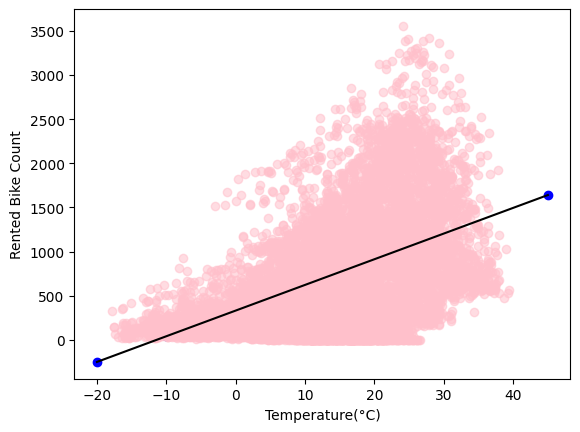

In [223]:
regresion = linear_model.LinearRegression()
temperatura = df_clean["Temperature(°C)"].values.reshape((-1, 1))

modelo = regresion.fit(temperatura, df_clean["Rented Bike Count"])

print("Intersección (b)", modelo.intercept_)
print("Pendiente (m)", modelo.coef_)

y_pred = modelo.predict(temperatura)
y_real = df_clean["Rented Bike Count"]


entrada = [[-20], [-10], [10], [45]]

df_clean["Rented Bike Count"]
plt.scatter(entrada, modelo.predict(entrada), color="blue")
plt.plot(entrada, modelo.predict(entrada), color="black")

plt.ylabel("Rented Bike Count")
plt.xlabel("Temperature(°C)")
plt.scatter(df_clean["Temperature(°C)"],df_clean["Rented Bike Count"] , color="pink", alpha=0.55)
plt.show()


In [224]:
#Calculo metricas para medir el modelo
mse = mean_squared_error(y_real, y_pred)
r2 = r2_score(y_real, y_pred)
rmse = np.sqrt(mse)
varianza=df_clean['Rented Bike Count'].var()
desviacion_estandar = df_clean['Rented Bike Count'].std()
print("RMSE:", rmse)
print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"varianza: {varianza}")
print(f"desviacion_estandar: {desviacion_estandar}")



RMSE: 543.496536511178
MSE: 295388.48519964615
R²: 0.2905716254704146
varianza: 416423.03025890654
desviacion_estandar: 645.3084768224469


# 2.1. Resumen de las métricas obtenidas Regresion Lineal

### MODELO DE REGRESION LINEAL

### METRICAS OBTENIDAS:
### RMSE (Raíz del Error Cuadrático Medio):
El RMSE de 543.50 indica que, en promedio, las predicciones del modelo se desvían en 543.50 unidades de los valores reales. Comparado con  el número de bicicletas rentadas.

R² (Coeficiente de Determinación):  Este valor indica que aproximadamente el 29.06% de la variabilidad en el número de bicicletas rentadas puede ser explicado por la variable de temperatura. Un R² de 0.29 es relativamente bajo, lo que sugiere que la temperatura por sí sola no es un predictor suficientemente fuerte para el número de bicicletas rentadas y podría ser útil explorar otras variables.

Varianza: La varianza es una medida de la dispersión de los datos en la variable objetivo ("número de Bicicletas rentadas"). Una varianza de 416423.030 indica que los datos del número de bicicletas rentadas están bastante dispersos.

## INTERPRETACION:
Cuando el RMSE es cercano a la desviación estándar de los datos, se podría considerar que el modelo tiene un rendimiento cercano a la variabilidad inherente de los datos. En este modelo el RMSE (543.50) es ligeramente inferior a la desviación estándar de los datos (645.31),
por lo que se podria considerar que el modelo tiene una precisión moderada según estas métricas,es importante considerar mejorar el modelo incluyendo más variables predictoras que podrían capturar mejor las relaciones no lineales o las interacciones entre variables, ya que no solo depende de una variable la prediccion del numero de biciletas rentadas.

Las métricas indican que el modelo actual podría no ser el mejor para predecir el número de bicicletas rentadas solo con la temperatura. La mejora del modelo podría implicar:

*   Incluir más variables: Como la hora del día, condiciones climáticas adicionales, días de la semana, etc.
*   Explorar modelos no lineales: Dado que la relación entre la temperatura y el alquiler de bicicletas podría no ser lineal.


# 3. Modelo de predicción mediante Regresión Múltiple

### Asignar las (variables independientes) y la variable objetivo (variable a predecir)

In [225]:
categorical_features = ['Seasons', 'Holiday', 'Functioning Day']
one_hot_encoder = OneHotEncoder()
preprocessor = ColumnTransformer(transformers=[('cat', one_hot_encoder, categorical_features)], remainder='passthrough')

X = df_clean[['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
               'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']]
y = df_clean['Rented Bike Count']

X_processed = preprocessor.fit_transform(X)

## Crear el modelo de regresión multiple y entrenarlo

In [226]:
# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [227]:
# Creo el modelo de regresión lineal y lo entreno
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [228]:
# Hago predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

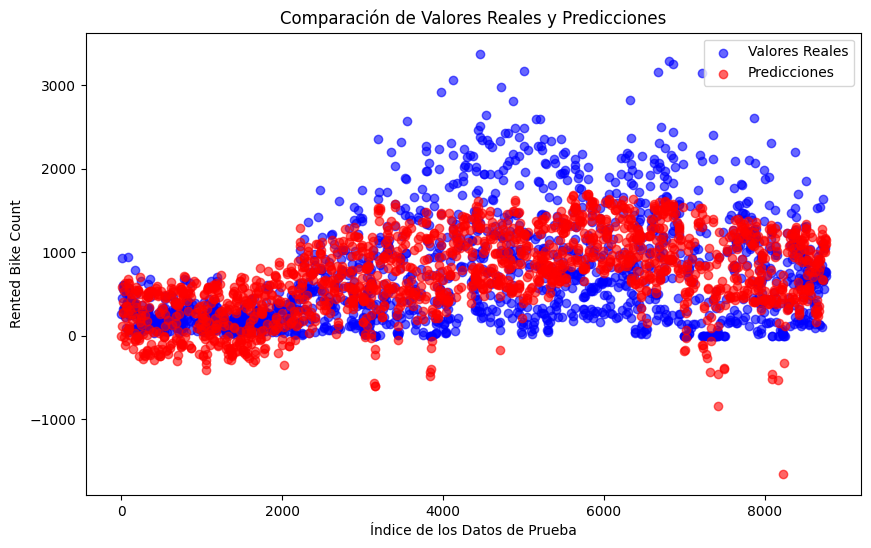

In [229]:
# Graficar las predicciones frente a los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Valores Reales', alpha=0.6)
plt.scatter(y_test.index, y_pred, color='red', label='Predicciones', alpha=0.6)
plt.title('Comparación de Valores Reales y Predicciones')
plt.xlabel('Índice de los Datos de Prueba')
plt.ylabel('Rented Bike Count')
plt.legend()
plt.show()

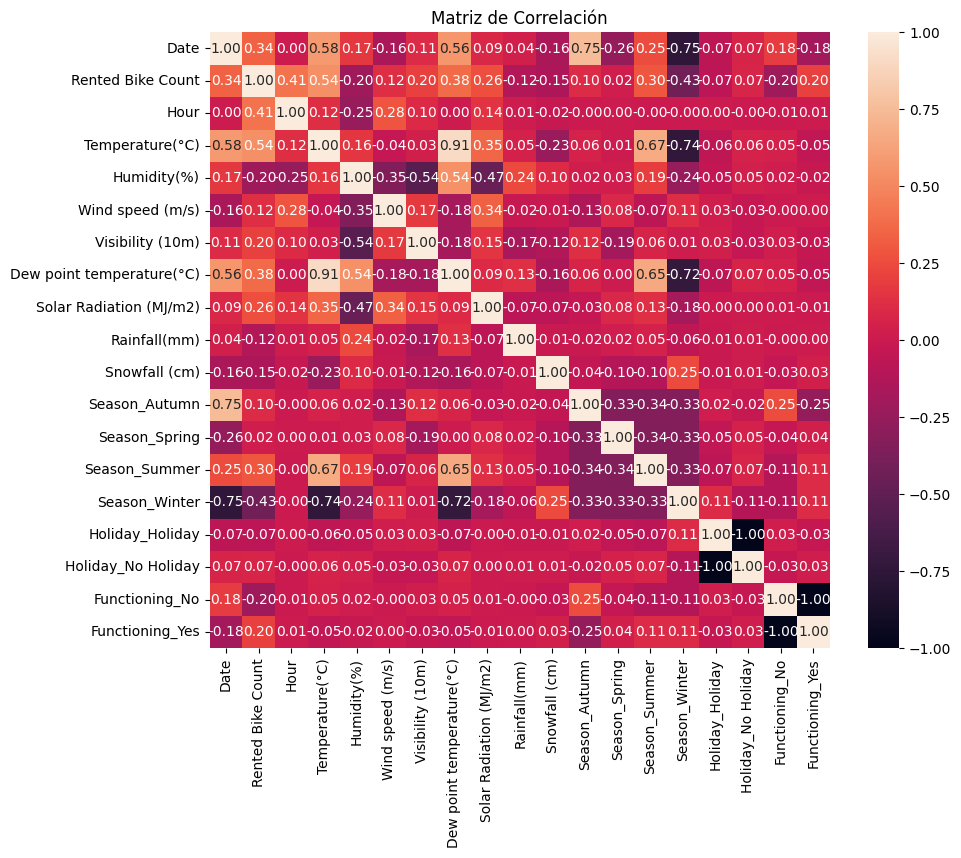

In [230]:
# Aplicar codificación one-hot a las columnas categóricas y concatenar con el DataFrame original
df_clean = pd.concat([
    df_clean,
    pd.get_dummies(df_clean['Seasons'], prefix='Season'),
    pd.get_dummies(df_clean['Holiday'], prefix='Holiday'),
    pd.get_dummies(df_clean['Functioning Day'], prefix='Functioning')
], axis=1)

# Eliminar las columnas originales categóricas si ya no son necesarias
df_clean.drop(['Seasons', 'Holiday', 'Functioning Day'], axis=1, inplace=True)

# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(), annot=True, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


In [231]:
df_clean.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning_No,Functioning_Yes
0,2017-12-01,254,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,False,False,False,True,False,True,False,True
1,2017-12-01,204,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,False,False,False,True,False,True,False,True
2,2017-12-01,173,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,False,False,False,True,False,True,False,True
3,2017-12-01,107,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,False,False,False,True,False,True,False,True
4,2017-12-01,78,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,False,False,False,True,False,True,False,True


### Evaluo al modelo

In [232]:
# Calcular y mostrar las métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
varianza = df_clean['Rented Bike Count'].var()
rmse = np.sqrt(mse)
print("RMSE:", rmse)
print("MSE:", mse)
print("R^2:", r2)
print("varianza",varianza)


# para obtener el DatasetFinal
df_clean.to_csv('/content/ProyectoFinal/SeoulBikeDataFinalRegresion.csv', index=False)

RMSE: 431.22369071808663
MSE: 185953.87143652802
R^2: 0.5495775698152165
varianza 416423.03025890654


# 3.1. Resumen de las métricas obtenidas Regresion Multiple

### MODELO DE REGRESION MULTIPLE

### METRICAS OBTENIDAS:
### RMSE (Raíz del Error Cuadrático Medio):
El RMSE de 431.22 indica que, en promedio, las predicciones del modelo se desvían en 431.22 unidades de los valores reales. Comparado con  el número de bicicletas rentadas. Este valor muestra una mejora significativa en comparación con un modelo lineal, sugiriendo que la inclusión de múltiples variables ha reducido el error promedio en las predicciones del modelo.


### R² (Coeficiente de Determinación):
Este valor de 0.55 indica que aproximadamente el 54.96% de la variabilidad en el número de bicicletas rentadas puede ser explicado por las variables incluidas en el modelo. Un R² de 0.55, aunque mejorado respecto a modelos anteriores, todavía sugiere que hay espacio para mejorar, ya que más de la mitad de la variabilidad sigue sin explicarse por el modelo.



## INTERPRETACION:
Comparando el RMSE con la desviación estándar de los datos (645.31), observamos que el RMSE es significativamente menor. Esto sugiere que el modelo de regresión múltiple ha mejorado en términos de ajuste a los datos, acercándose más a la dispersión real de los datos observados. Sin embargo, aunque el RMSE ha mejorado, aún hay una cantidad considerable de error que podría ser reducido.

Las métricas indican una mejora con relaacion del modelo lineal al incorporar múltiples variables. Sin embargo, un R² de 0.55 aún refleja que hay factores adicionales y posiblemente interacciones complejas entre variables que no están siendo capturadas completamente por el modelo actual.

Las métricas indican que el modelo actual podría no ser el mejor para predecir el número de bicicletas rentadas solo con la temperatura. La mejora del modelo podría implicar:

*  Explorar modelos no lineales: Dado que la relación entre las variables y el número de bicicletas rentadas podría no ser totalmente lineal, explorar modelos que pueden capturar estas no linealidades, como árboles de decisión o modelos de aprendizaje automático más avanzados, podría ser beneficioso.
